- **This Project is about calorie prediction with machine learning using python. We will predict calories based on some features**
- **Calories in the food we eat provide energy in the form of heat so that we can function. This means that we need to eat a certain amount of calories just to sustain life.**
- **But if we take too many calories, then we risk gaining weight.**
- **So, there is need to burn calories , for burning calories we do exercise and more.**
- **To know how much calories we have burn Today we are going to build a machine learning model that predict calories based on some data.**
- **so, lets get started.**

### WorkFlow
1. Data Collection
2. Data PreProcessing
3. Data Analysis
4. Train Test Data
5. Applying mL algorithms
6. Evalution 
7. Deployment

In [1]:
# Importing essential libraries we will import ML models as per our needs.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Preprocessing
- **This Dataset is from the kaggle :- https://www.kaggle.com/fmendes/fmendesdat263xdemos**
- We have two csv files to load where one file consist of the **calories** and other file consist of **exercises** w.r.to *Heart_Rate , Height , Weight , Age* etc.
- So, Here we have to simply merge the file or concat the file

In [2]:
# Loading the data from csv file to pandas data frame
# Loading the calories file.

target = pd.read_csv("calories.csv")
target.shape

(15000, 2)

In [3]:
target.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
# Loading the exercises file
features = pd.read_csv("exercise.csv")
features.shape

(15000, 8)

In [5]:
features.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
# Now Merging or concatening the files
calories = pd.concat([features,target["Calories"]],axis=1)
calories.shape

(15000, 9)

In [7]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


#### Overview of the dataset

In [8]:
dic = {"Features":["Gender","Age","Height","Weight","Duration","Heart Rate","Body Temp","Calories"],
      "Description":["Gender of a person (Male & Female)",
                     "Age of person",
                     "Height of person in (cm)",
                     "Weight of a person in (Kg)",
                    "Duration of person's exercise / activity",
                    "Heart rate per duration of a person",
                    "Body Temperature of a person in (C)",
                    "Calories burned in kilo calories"]}

Overview_of_dataset = pd.DataFrame(dic,index=["1","2","3","4","5","6","7","8"])
Overview_of_dataset

,Features,Description
1,Gender,Gender of a person (Male & Female)
2,Age,Age of person
3,Height,Height of person in (cm)
4,Weight,Weight of a person in (Kg)
5,Duration,Duration of person's exercise / activity
6,Heart Rate,Heart rate per duration of a person
7,Body Temp,Body Temperature of a person in (C)
8,Calories,Calories burned in kilo calories


In [9]:
# Droping the User_id column.
calories.drop("User_ID",axis=1,inplace=True)

#### Data Analysis & Data Exploration :- 

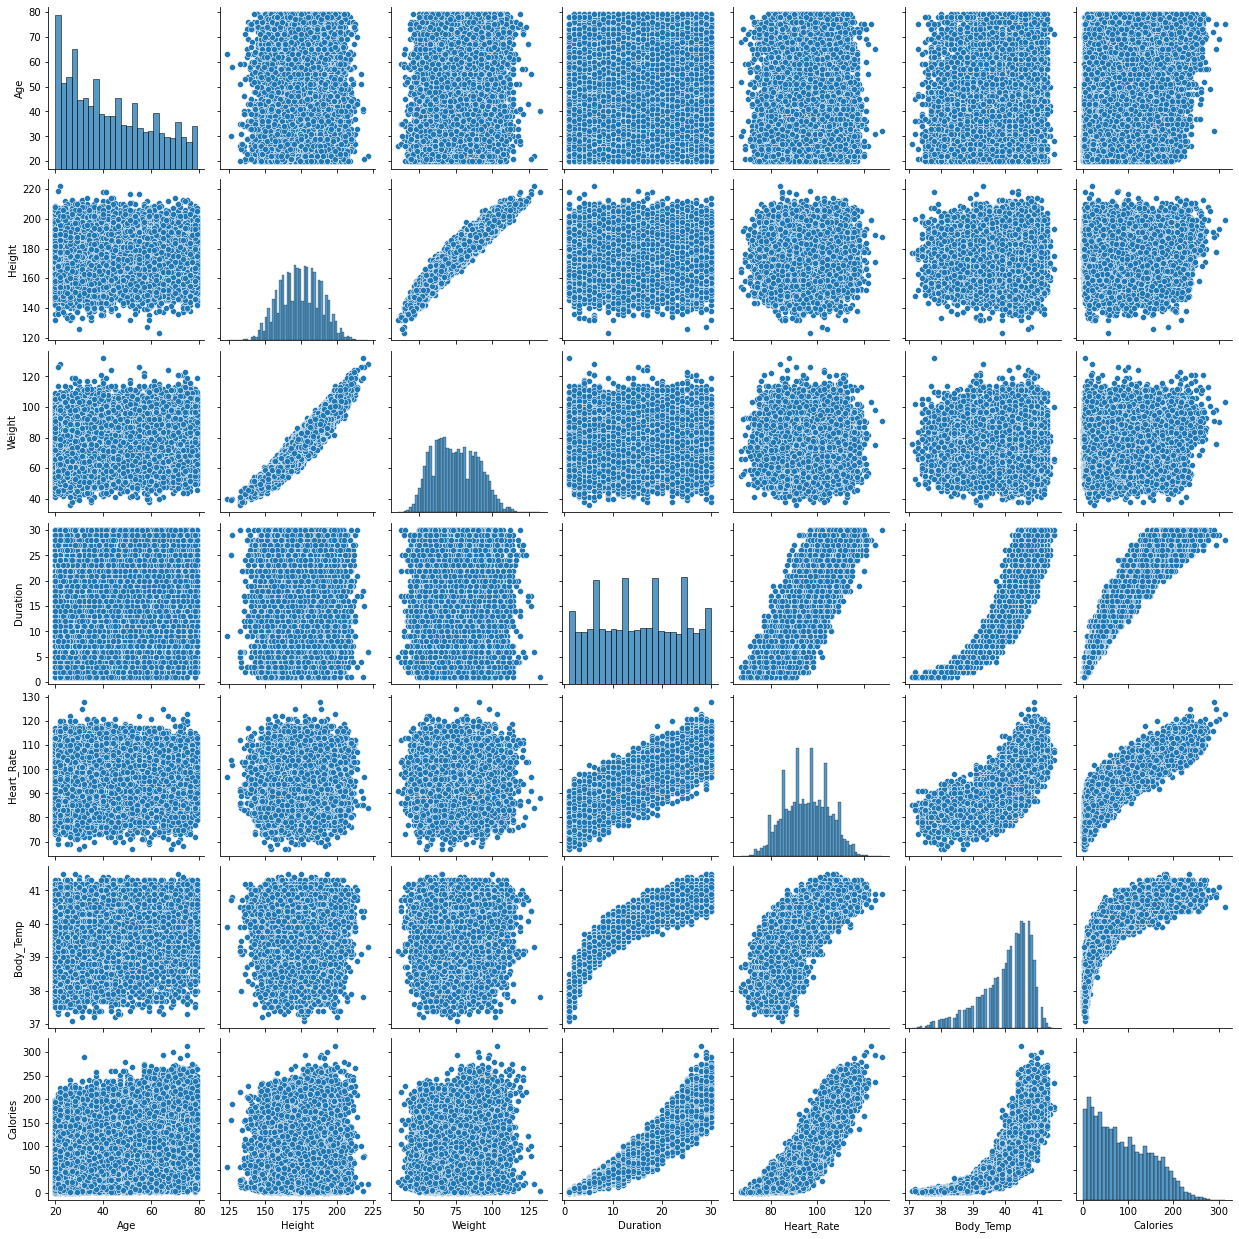

In [10]:
sns.pairplot(calories)
plt.show()

In [11]:
# Gettin some info of the data
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


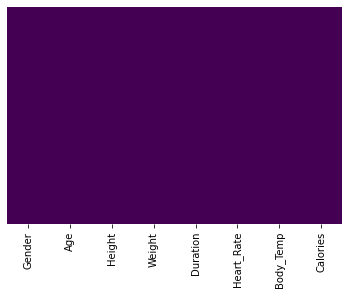

In [12]:
# Using heatmap for better visualization for null values
sns.heatmap(calories.isna(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [13]:
# Get some statistical measures about the data
calories.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


- There is no huge difference between mean and max values so by this we can clarify that there are not many outliers in the data.

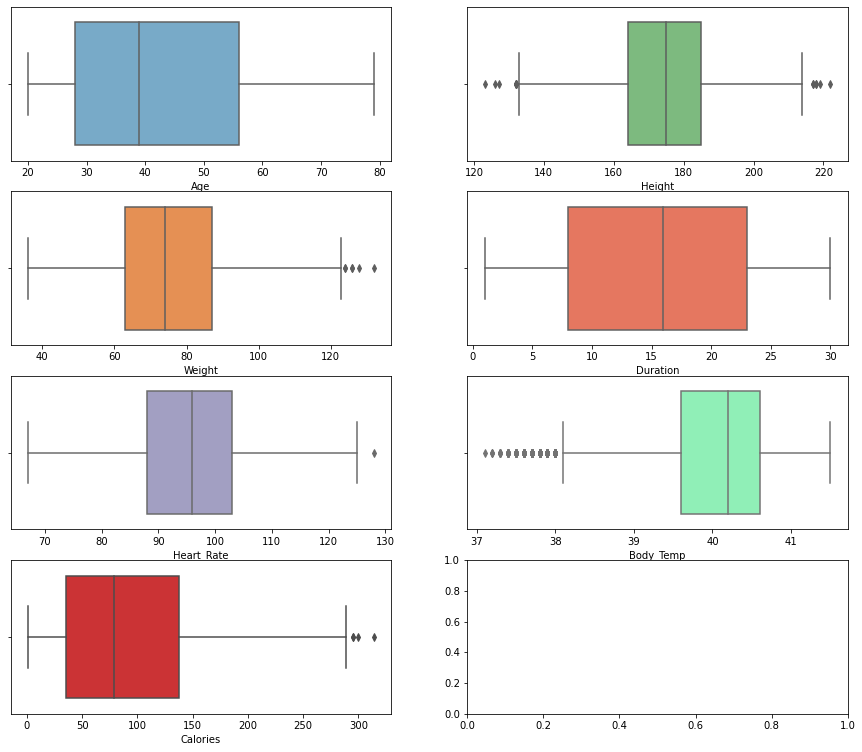

In [14]:
# Using Boxlpot for visualization of outliers

fig , axes = plt.subplots(4,2,figsize=(15,13))
sns.boxplot(calories["Age"] , ax=axes[0,0],palette="Blues")
sns.boxplot(calories["Height"] , ax=axes[0,1],palette="Greens")
sns.boxplot(calories["Weight"] , ax=axes[1,0],palette="Oranges")
sns.boxplot(calories["Duration"] , ax=axes[1,1],palette="Reds")
sns.boxplot(calories["Heart_Rate"] , ax=axes[2,0],palette="Purples")
sns.boxplot(calories["Body_Temp"] , ax=axes[2,1],palette="rainbow")
sns.boxplot(calories["Calories"] , ax=axes[3,0],palette="Set1")
plt.show()

- With the help of visualziation we can see there are some outliers but the range is not high enough for eg:-
- In **weight** one can have weight upto **130**.
- In **Body_Temperature** one can have temperature of **36C** if there is cold.  

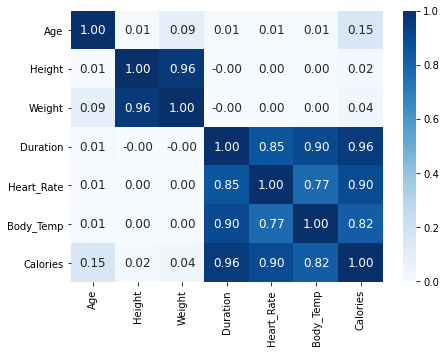

In [15]:
# Constructing heatmap to understand the correlation
plt.figure(figsize=(7,5))
sns.heatmap(calories.corr() , annot=True , fmt=".2f" , annot_kws={"size":12} , cmap="Blues")
plt.show()

-  Heatmap gives color based on the values and this values are calculated based on relation between the data.
- If the Values is 1 or close to 1 then the columns are positively correlated.
- Here ,  **Height** and **Weight** columns are highly correlated about **1.0** . This can cause Multicolinarity in the dataset and which will get result to be unreliable.
- The **Duration , Heart_Rate , Body_Temp** have a good correlation with Calories and this features are also important to predict the calories.

- According to the heatmap, **Weight** and **Height** have a high correlation but we combined them and put them into the **BMI** column.So we can drop **Weight** and **Height** columns and save **BMI**.

In [16]:
# Checking the distribution of Gender Feature

calories["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

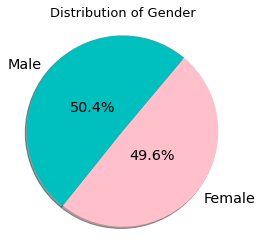

In [17]:
# Plotting a Gender pie chart

plt.pie(calories["Gender"].value_counts(),
       labels = ["Male","Female"],
       colors= ["c","pink"],
       shadow=True,
       radius=1.1,
       autopct="%.1f%%",
       pctdistance=0.4,
       textprops={'size': 'x-large'},
       startangle=50)
plt.title('Distribution of Gender', fontsize=13)

plt.show()

-  We have equal distibution of **Male** and **Female** data points 

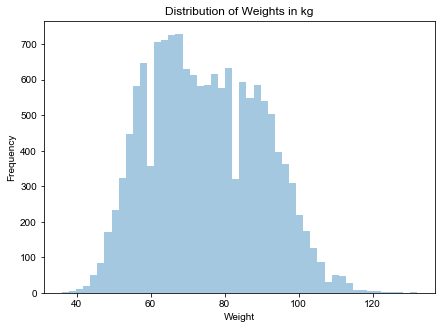

In [18]:
# Checking the Distribution of Weight
plt.figure(figsize=(7,5))
sns.distplot(calories["Weight"] , kde=False )
custom_params = {"axes.spines.right": False, "axes.spines.top":False}
sns.set_theme(style="white" , rc=custom_params)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weights in kg")
plt.show()

- The Averga Weight for this Dataset is 74 and we have more people with the weight group between **65 - 75** 


- Calculate the BMI (Body Mass Index)
- formula : -
- **BMI = weight (kg) / Height^2 (m)** 

#### Feature Engineering

In [19]:
calories["BMI"] = calories["Weight"] / ((calories["Height"] / 100)**2)
calories["BMI"] = round(calories["BMI"] , 1)

In [20]:
calories.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.8
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.7
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.2
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.5


In [21]:
dic = {"Category":["UnderWeight","Normal Range","OverWeight","Obese"],
      "Percentile Range":["BMI < 18.5","BMI 18.5 - 25","BMI 25 - 30","BMI > 30"]}

BMI_Table = pd.DataFrame(dic)
BMI_Table

,Category,Percentile Range
0,UnderWeight,BMI < 18.5
1,Normal Range,BMI 18.5 - 25
2,OverWeight,BMI 25 - 30
3,Obese,BMI > 30


- This BMI Chart is universal and the link for this chart :- https://www.calculator.net/bmi-calculator.html

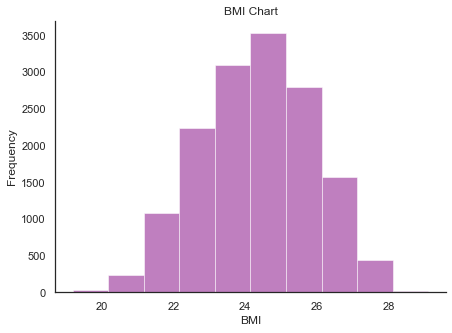

In [22]:
# BMI Frequency
plt.figure(figsize=(7,5))
calories["BMI"].plot(kind="hist" ,color="purple" , alpha=0.5)
plt.title("BMI Chart")
plt.xlabel("BMI")
plt.show()

- This BMI chart is not enough to check how many individuals are overweight or normal or obese for this we have to divide the bmi numeric column into bmi_categories

In [23]:
# BMI numeric to bmi_category for better understanding of the data
bmi_category = ["UnderWeight" , "Normal" , "OverWeight" , "Obsese"] 

calories["bmi_category"] = pd.cut(calories["BMI"] , bins = [0 , 18  , 25 , 30 , 35 ] , right=False , labels=bmi_category)
calories["bmi_category"].head()

0    OverWeight
1        Normal
2        Normal
3        Normal
4        Normal
Name: bmi_category, dtype: category
Categories (4, object): ['UnderWeight' < 'Normal' < 'OverWeight' < 'Obsese']

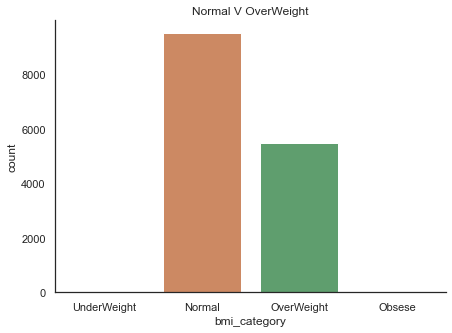

In [24]:
# bmi_category counts
plt.figure(figsize=(7,5))
sns.countplot(calories["bmi_category"],data=calories)
plt.title("Normal V OverWeight")
plt.show()

- As we can see, many parts of the dataset consist of **Normal** individuals.
- The Second and last group is **OverWeight** group.
- Other groups are not in the dataset which is normal Because **Obese** and **UnderWeight** persons do not tend to do exercise.

In [25]:
# bmi_category v gender
pd.crosstab(calories["Gender"] , calories["bmi_category"])

bmi_category,Normal,OverWeight
Gender,,
female,6873,680
male,2645,4802


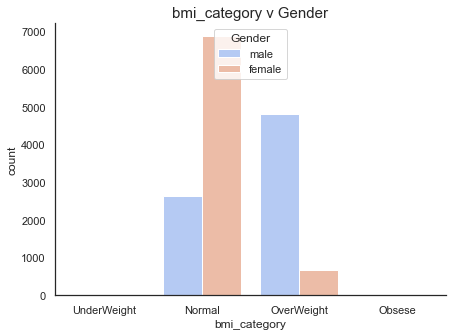

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(calories["bmi_category"] , hue="Gender" , data=calories ,palette="coolwarm")
plt.title("bmi_category v Gender" , size=15)
plt.show()

- An intresting thing is that this graph shows is the weight distribution of **Females** are more Normal Weight than **Males.**
- Men need more exercise to burn more calories.

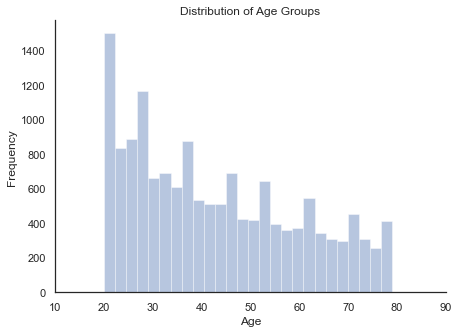

In [27]:
# Checking the Distribution of Age
plt.figure(figsize=(7,5))
sns.distplot(calories["Age"] , kde=False )
plt.xlim((10,90))
custom_params = {"axes.spines.right": False, "axes.spines.top" : False}
sns.set_theme(style="whitegrid" , rc=custom_params)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age Groups")
plt.show()

- we want to see which age groups are highest percentage of age groups present in the data.
- so, we will divide the continous Age column into a categorical column by the range of [Young , Middle , Old]

In [28]:
# we have to split this age data into categorical age_groups to fnd which age_groups are higher in this dataset and there bmi scores . 
age_groups = ["Young", "Middle" , "Old"]
calories["age_groups"] = pd.cut(calories["Age"] , bins= [20,40,60,80] , right=False , labels= age_groups)

In [29]:
calories.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,bmi_category,age_groups
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.0,OverWeight,Old
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.8,Normal,Young
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.7,Normal,Old
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.2,Normal,Young
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.5,Normal,Young


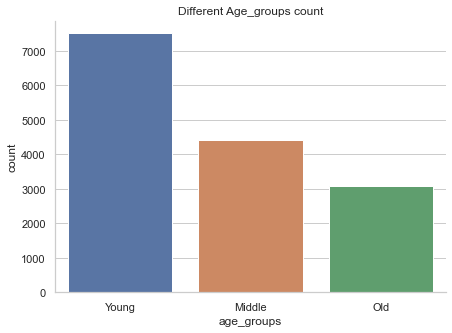

In [30]:
# age_groups count
plt.figure(figsize=(7,5))

sns.countplot("age_groups",data=calories)
plt.title("Different Age_groups count")
plt.show()

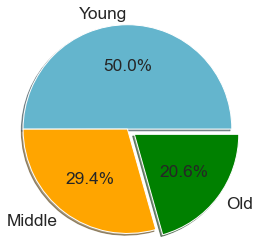

In [31]:
# Plotting a age_groups pie chart for better understanding of age percentages.

plt.pie(calories["age_groups"].value_counts(),
       labels = ["Young" , "Middle" , "Old"],
       colors= ["c" , "orange" , "green"],
       autopct="%.1f%%",
       explode = (0,0,0.1),
       shadow=True,
       radius=1.2,
       textprops = {"size":"x-large"})

plt.show()

         -  We have found out that Young People are highly interested in burning calories.

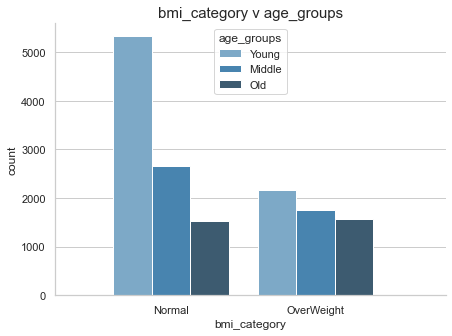

In [32]:
# age_groups and there bmi_categorys 
plt.figure(figsize=(7,5))
sns.countplot(calories['bmi_category'] , hue="age_groups" , data=calories , palette="Blues_d")
plt.xlim([0.2,2.9])
plt.title("bmi_category v age_groups" , size=15)
plt.show()

-  Here , **50%** of Old individuals have **Normal** Weight and other **50%** have **Overweight**.

Text(0.5, 1.0, 'Duration per minute')

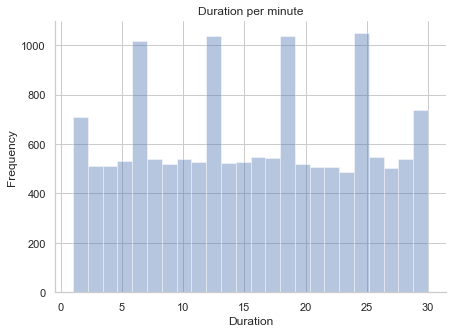

In [33]:
# Checking the Distribution of Duration of workout
plt.figure(figsize=(7,5))
sns.distplot(calories["Duration"] , kde=False )
cutom_params = {"axes.spines.top" : False , "axes.spines.right":False}
sns.set_theme(style="white" , rc=cutom_params)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Duration per minute")

- By this Dataset the higest Duration for exercise and to burn some calories is **30min**

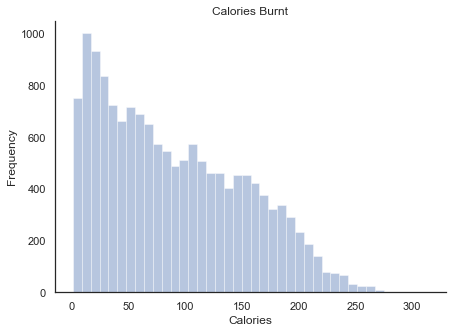

In [34]:
# Checking the Distribution of Calories
plt.figure(figsize=(7,5))
sns.distplot(calories["Calories"] , kde=False , bins = 40 )
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Calories Burnt")
plt.show()

- Less Number of people are burning calories eg:- less than 100 people are burning around **250 - 300 Calories**
---

---
- Now Lets visually see the correlation of **Duration** , **Heart-Rate** , **Body-Temp** with respect to **Calories** Beacuse This features have a good correlation.


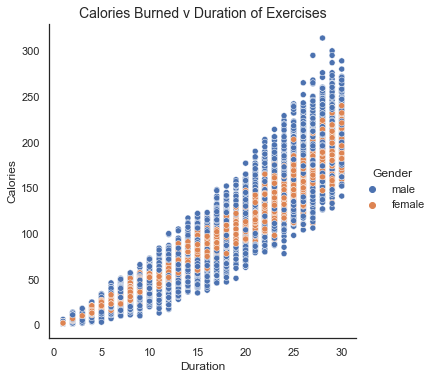

In [35]:
sns.relplot(calories["Duration"] , calories["Calories"] , data=calories , hue="Gender")
plt.title("Calories Burned v Duration of Exercises" , size=14)
sns.set_style("whitegrid")
plt.show()

- Here we can clear see that if we increase the **Duration** of our workout then we tend to burn more **calories**.

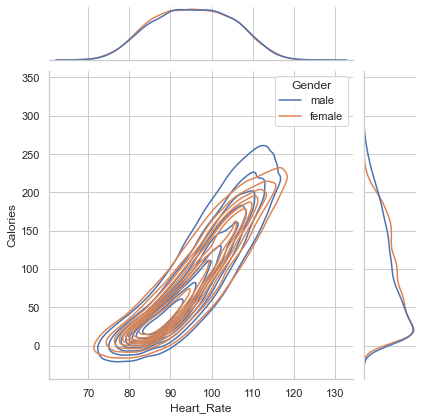

In [36]:
sns.jointplot(calories["Heart_Rate"] , calories["Calories"] , data=calories, kind="kde" , hue="Gender")
plt.show()

- Here also as the **Heart_Rate** increases people tend to Burn more **Calories**.
- We can burn Calories only if we can sweat hard if  Body_Temp increases.

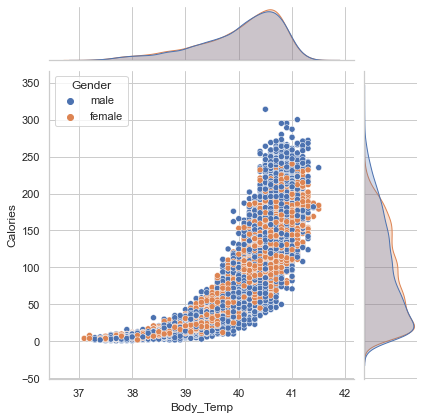

In [37]:
sns.jointplot(calories["Body_Temp"] , calories["Calories"] , data=calories , hue="Gender")
plt.show()

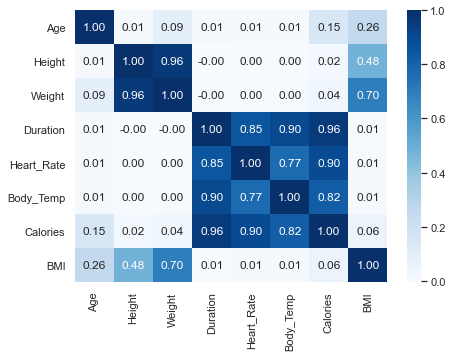

In [38]:
plt.figure(figsize=(7,5))
sns.heatmap(calories.corr() , annot=True , fmt=".2f" , annot_kws={"size":12} , cmap="Blues")
plt.show()

- According to the heatmap , **Weight** and **Height** have a high correlation but we combined them to put then into the **BMI** column
- So, We can drop **Weight** and **Height** columns to save **BMI**

In [39]:
calories.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,bmi_category,age_groups
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.0,OverWeight,Old
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.8,Normal,Young
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.7,Normal,Old
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.2,Normal,Young
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.5,Normal,Young


In [40]:
# Dropping unwanted columns
calories.drop(["Height" , "Weight", "age_groups" ,"bmi_category"],axis=1,inplace=True)

- Before we feed our data to the model we hae to first convert **categorical** column like **Gender** into **numerical** column

In [41]:
# Using Label Encoder for encoding categorical column into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
calories["gender"] = le.fit_transform(calories["Gender"])

In [42]:
# Drop the Categorical gender Column
calories.drop("Gender",axis=1,inplace=True)

In [43]:
calories.head()

,Age,Duration,Heart_Rate,Body_Temp,Calories,BMI,gender
0,68,29.0,105.0,40.8,231.0,26.0,1
1,20,14.0,94.0,40.3,66.0,21.8,0
2,69,5.0,88.0,38.7,26.0,24.7,1
3,34,13.0,100.0,40.5,71.0,22.2,0
4,27,10.0,81.0,39.8,35.0,24.5,0


#### Train Test Data

In [44]:
# Splitting the data into independent variable and dependent variable 
x = calories.drop("Calories",axis=1)
y = calories["Calories"]

In [45]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

#### Applying ML algorithms
- **Linear Regression**

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
ypred_lr = lr.predict(Xtest)

In [47]:
# Coefficients for every features
coeff_lr = pd.DataFrame([calories.columns.drop("gender") , lr.coef_]).T
coeff_lr.rename(columns={0:"Features" , 1:"Coefficients"})

,Features,Coefficients
0,Age,0.506587
1,Duration,6.673425
2,Heart_Rate,1.946741
3,Body_Temp,-17.001218
4,Calories,0.230314
5,BMI,1.52238


In [48]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MAE:- ",mean_absolute_error(ytest,ypred_lr))
print("RMSE:- ",np.sqrt(mean_squared_error(ytest,ypred_lr)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_lr))
print("Training Accuracy:-",lr.score(Xtrain,ytrain))

MAE:-  8.413043582670246
RMSE:-  11.621611335607634

Accuracy:-  0.9661281530160607
Training Accuracy:- 0.967039312967065


- Linear Regression is performing well not even overfitting but there are lots of error might be because of outliers.

In [49]:
# Cross Validation for Linear Regression              
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr , x ,y,cv=10,)

print("Mean Accuracy:- ",cvs.mean())
print("STD:- ",cvs.std())

Mean Accuracy:-  0.9667445898125671
STD:-  0.0013056411631281544


- The Standard Deviation is very low which tells us that the values are spread close to mean.

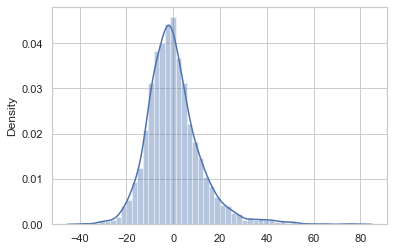

In [50]:
# Distribution of residuals
sns.distplot([ytest - ypred_lr])
plt.show()

#### KNN Classifer

In [51]:
# Default KNN

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(Xtrain,ytrain)
ypred_knn = knn.predict(Xtest)


print("MAE:- ",mean_absolute_error(ytest,ypred_knn))
print("RSME:- ",np.sqrt(mean_squared_error(ytest,ypred_knn)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_knn))

MAE:-  4.312
RSME:-  6.589070636429074

Accuracy:-  0.9891118395741495


- KNN is perfroming well as compared to linear Regression even the knn is sensitive to outliers.

In [52]:
# Hyperparameter tunning for knn

n = list(range(1,30))
accuracy = []

for i in n:
    knn = KNeighborsRegressor(n_neighbors=i , metric="euclidean")
    knn.fit(Xtrain,ytrain)
    ypred_knn = knn.predict(Xtest)
    
    acc = r2_score(ytest,ypred_knn)
    accuracy.append(acc)

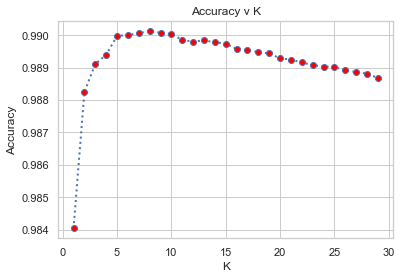

In [53]:
plt.plot(n,accuracy,ls=":",lw=2,marker="o",markerfacecolor="red")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy v K")
plt.show()

In [54]:
knn_hpt = KNeighborsRegressor(n_neighbors=8 , metric="euclidean")
knn_hpt.fit(Xtrain,ytrain)
ypred_knn_hpt = knn_hpt.predict(Xtest)


print("MAE:- ",mean_absolute_error(ytest,ypred_knn_hpt))
print("RSME:- ",np.sqrt(mean_squared_error(ytest,ypred_knn_hpt)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_knn_hpt))
print("Training Accuracy:-",knn.score(Xtrain,ytrain))

MAE:-  4.0818055555555555
RSME:-  6.27018490556698

Accuracy:-  0.9901402278046251
Training Accuracy:- 0.9898312629490882


- The MAE & RMSE is slightly decrease but still there is are some erros left.

In [55]:
# Cross Validation for KNN
cvs = cross_val_score(knn , x , y ,cv=10)
print("Average Accuracy:- ",cvs.mean())
print("STD:- ",cvs.std())

Average Accuracy:-  0.9897846097448226
STD:-  0.0007112511431594285


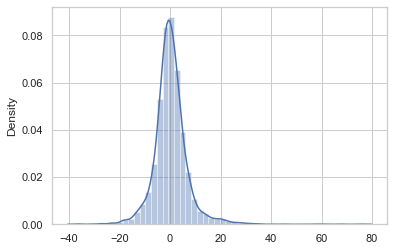

In [56]:
# Distribution of residuals
sns.distplot([ytest - ypred_knn])
plt.show()

#### DecisionTreeRegressor

In [57]:
# Default Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
dt.fit(Xtrain,ytrain)
ypred_dt = dt.predict(Xtest)

print("MAE:- ",mean_absolute_error(ytest,ypred_dt))
print("RMSE:- ",np.sqrt(mean_squared_error(ytest,ypred_dt)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_dt))
print("Training Accuracy:- ",dt.score(Xtrain,ytrain))

MAE:-  4.006777777777778
RMSE:-  6.213681141910432

Accuracy:-  0.990317129771329
Training Accuracy:-  0.9999999876728358


- There are huge errors for criterion mse and all set to default

In [58]:
# Hyper Parameter tunning for DecisionTreeRegressor
params = {"criterion":["mae","friedman_mse"],
         "max_features":[4,5,6]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dt , params , cv=10 , n_jobs=-1 ,refit=True)
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['mae', 'friedman_mse'],
                         'max_features': [4, 5, 6]})

In [59]:
print("Best_estimators:- ",grid.best_estimator_)
print('Best Score:- ',grid.best_score_)

Best_estimators:-  DecisionTreeRegressor(criterion='friedman_mse', max_features=6, random_state=1)
Best Score:-  0.9903224984201398


In [60]:
dt_hpt = DecisionTreeRegressor(criterion="friedman_mse" , max_features=6, random_state=1 ,max_depth=11)
dt_hpt.fit(Xtrain,ytrain)
ypred_dt_hpt = dt_hpt.predict(Xtest)

print("MAE:- ",mean_absolute_error(ytest,ypred_dt_hpt))
print("RMSE:- ",np.sqrt(mean_squared_error(ytest,ypred_dt_hpt)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_dt_hpt))
print("Training Accuracy:-",dt_hpt.score(Xtrain,ytrain))

MAE:-  3.9706739455037376
RMSE:-  6.047813649366709

Accuracy:-  0.9908271775750942
Training Accuracy:- 0.9977941361338157


- Before Accuracy
- MAE:-  4.006777777777778
- RMSE:-  6.213681141910432

- Accuracy:-  0.990317129771329
- Training Accuracy:-  0.9999999876728358

- There is 1% decrease in the error

In [61]:
# Average Accuracy for Decision Tree 
cvs = cross_val_score(dt_hpt , x , y ,cv=10 , n_jobs=-1)

print("Average Accuracy:- ",cvs.mean())
print("STD:- ",cvs.std())

Average Accuracy:-  0.9920390141293055
STD:-  0.0005235827353378161


#### RandomForestRegressor

In [62]:
# Default
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain,ytrain)
ypred_rf = rf.predict(Xtest)

print("MAE:- ",mean_absolute_error(ytest,ypred_rf))
print("RMSE:- ",np.sqrt(mean_absolute_error(ytest,ypred_rf)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_rf))

MAE:-  2.572668259259259
RMSE:-  1.6039539454919705

Accuracy:-  0.9961259301307498


- RandomForestRegressor is best among all the regressors
- Because it runs efficiently on large dataset
- RandomForest handles outliers , and if there is noise in the dataset
- Also Randomforest is powerful as compared to other regressor algorithms

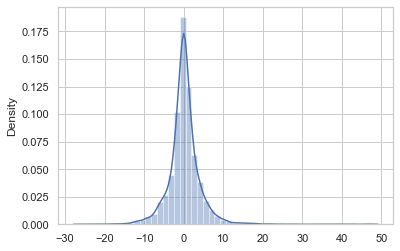

In [63]:
sns.distplot([ytest-ypred_rf])
plt.show()

In [64]:
# Hyper Parameter Tunning in RandomForest
params = {"n_estimators":[10 , 100 , 1000],
         "max_features":[2 , 2, 3],
         "max_depth": [2, 4, 6]}

grid = GridSearchCV(rf , params , cv=5, scoring="neg_mean_squared_error", n_jobs=-1 , verbose=3)
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6], 'max_features': [2, 2, 3],
                         'n_estimators': [10, 100, 1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [65]:
print("best_estimators:- ",grid.best_estimator_)
print("best_params:- ",grid.best_params_)

best_estimators:-  RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000)
best_params:-  {'max_depth': 6, 'max_features': 3, 'n_estimators': 1000}


In [66]:
rf_hpt = RandomForestRegressor(n_estimators=1000, max_depth=6 , max_features=3)
rf_hpt.fit(Xtrain,ytrain)
ypred_rf_hpt = rf_hpt.predict(Xtest)

print("MAE:- ",mean_absolute_error(ytest,ypred_rf_hpt))
print("RMSE:- ",np.sqrt(mean_absolute_error(ytest,ypred_rf_hpt)))
print()
print("Accuracy:- ",r2_score(ytest,ypred_rf_hpt))

MAE:-  5.251652294709549
RMSE:-  2.291648379378815

Accuracy:-  0.9834223533676002


- Default Random_Forest is better for this model

In [67]:
# Average Accuracy for RandomForest
cvs = cross_val_score(rf_hpt , x, y, cv=10 , n_jobs=-1)
print("Average Accuracy:- ",cvs.mean())
print("STD:- ",cvs.std())

Average Accuracy:-  0.984305011646682
STD:-  0.000944631383318125


#### Evaluation

In [68]:
dic = {"Models":["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor"],
       "MAE Error":[mean_absolute_error(ytest,ypred_lr),
                   mean_absolute_error(ytest,ypred_knn_hpt),
                   mean_absolute_error(ytest,ypred_dt_hpt),
                   mean_absolute_error(ytest,ypred_rf)],
       "RMSE Error":[np.sqrt(mean_squared_error(ytest,ypred_lr)),
                    np.sqrt(mean_squared_error(ytest,ypred_knn_hpt)),
                    np.sqrt(mean_squared_error(ytest,ypred_dt_hpt)),
                    np.sqrt(mean_squared_error(ytest,ypred_rf))],
       "Accuracy":[r2_score(ytest,ypred_lr),
                 r2_score(ytest,ypred_knn_hpt),
                 r2_score(ytest,ypred_dt_hpt),
                 r2_score(ytest,ypred_rf)],
      "Mean Score":["0.966","0.989","0.992","0.984"]}


Accuracy = pd.DataFrame(dic)
Accuracy

,Models,MAE Error,RMSE Error,Accuracy,Mean Score
0,LinearRegression,8.413044,11.621611,0.966128,0.966
1,KNeighborsRegressor,4.081806,6.270185,0.990140,0.989
2,DecisionTreeRegressor,3.970674,6.047814,0.990827,0.992
3,RandomForestRegressor,2.572668,3.930345,0.996126,0.984


- **Linear Regression** is giving higest accuracy but Linear Regression is also giving the higest Error.
- **KNeighbours** is not good for this dataset.
- **DecisionTreeRegressor** is giving the higest Mean Score for 10 different splits but still there are some errors.
- **RandomForestRegressor** is best for this dataset, because there is least amount of error in Randomforest.
- Because **RandomForest** is verstile algoritm and it is robust to handles outliers , missing values and also for higher dimensions it perfroms well.

#### Deployment

In [69]:
import pickle

In [70]:
filename = "caloriesprediction.sav"
pickle.dump(rf, open(filename , "wb"))

In [71]:
claoriess = pickle.load(open('caloriesprediction.sav',"rb"))

# ThankYou